In [1]:
from osgeo import gdal

import numpy as np
import matplotlib.pyplot as plt

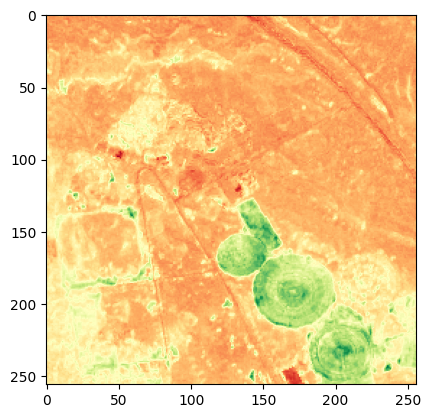

In [4]:
sub_image = "C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project-main\\Docs\\sub_images\\RUH_2018-12-15_0_14.npy"
# Load the sub-image as a NumPy array
sub_image = np.load(sub_image)
ndvi_processed = np.nan_to_num(sub_image, nan=0.01)
plt.imshow(ndvi_processed,cmap='RdYlGn')

c:\Users\Musae\AppData\Local\Programs\Python\Python311\Lib\site-packages\osgeo\gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


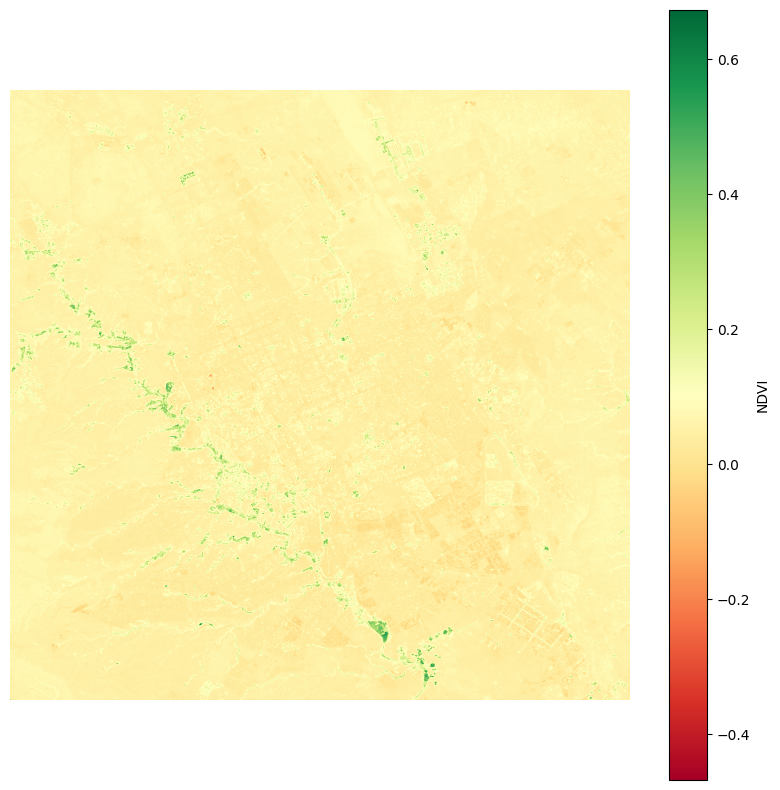

In [2]:
sub_image = gdal.Open('C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project-main\\Docs\\NDVI-Data\\NDVI_RUH-B4-B8_2023-12-19.tif')

NDVI = sub_image.GetRasterBand(1)
NDVI_array = NDVI.ReadAsArray()
ndvi_processed_all = np.nan_to_num(NDVI_array, nan=0.01)


plt.figure(figsize=(10, 10))
plt.imshow(ndvi_processed_all, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.axis('off')  # Turn off the axis
plt.show()

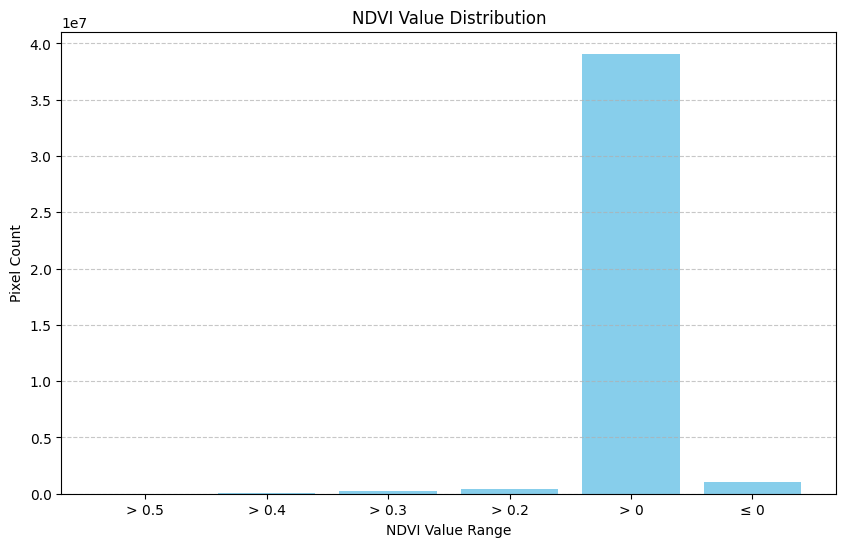

[18895, 89581, 226744, 454911, 39088688, 1014706]


In [16]:
cluster_counts = [0, 0, 0, 0, 0, 0]

# Loop over each pixel in the NDVI array
for row in range(ndvi_processed_all.shape[0]):  
    for col in range(ndvi_processed_all.shape[1]): 
        value = ndvi_processed_all[row, col]
        if value > 0.5:
            cluster_counts[0] += 1
        elif value > 0.4:
            cluster_counts[1] += 1
        elif value >0.3:
            cluster_counts[2] += 1
        elif value >0.2:
            cluster_counts[3] += 1

        elif value > 0:
            cluster_counts[4] += 1
        else:
            cluster_counts[5] += 1


cluster_labels = ['> 0.5', '> 0.4', '> 0.3', '> 0.2', '> 0', '≤ 0']

plt.figure(figsize=(10, 6))
plt.bar(cluster_labels, cluster_counts, color='skyblue')
plt.title('NDVI Value Distribution')
plt.xlabel('NDVI Value Range')
plt.ylabel('Pixel Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print(cluster_counts)

In [17]:
from sklearn.cluster import KMeans

c:\Users\Musae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Musae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Musae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Musae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

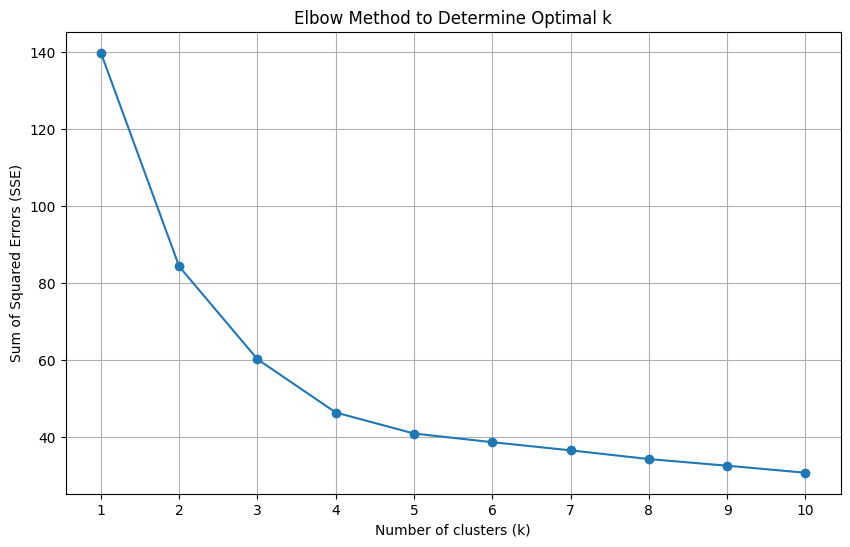

In [18]:


# Function to determine the optimal number of clusters using the Elbow Method
def find_optimal_k(ndvi_processed_all):
    k_values = range(1, 11)
    sse = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=0).fit(ndvi_processed)
        sse.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, sse, '-o')
    plt.title('Elbow Method to Determine Optimal k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()



find_optimal_k(ndvi_processed_all)

In [19]:


def cluster_image(ndvi_processed_all, optimal_k):
    if ndvi_processed_all.ndim == 3:
        # For 3D arrays: Reshape assuming the third dimension is color channels
        original_shape = ndvi_processed_all.shape[:2]  # Get the original height and width
        pixels = ndvi_processed_all.reshape(-1, ndvi_processed_all.shape[2])  # Reshape to a 2D array for K-Means
    elif ndvi_processed_all.ndim == 2:
        # For 2D arrays: Use directly for K-Means
        original_shape = ndvi_processed_all.shape
        pixels = ndvi_processed_all.flatten().reshape(-1, 1)  # Reshape to 2D array with one feature
    else:
        raise ValueError("Unsupported image dimensionality. Image must be 2D or 3D.")

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(pixels)
    
    # Reshape the labels back to the original image shape
    clustered_img = kmeans.labels_.reshape(original_shape)
    
    # Plotting
    plt.figure(figsize=(10, 10))
    plt.imshow(clustered_img, cmap='RdYlGn')
    plt.title(f'Image clustered into {optimal_k} colors')
    plt.axis('off')  # Hide axes ticks
    plt.show()



c:\Users\Musae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


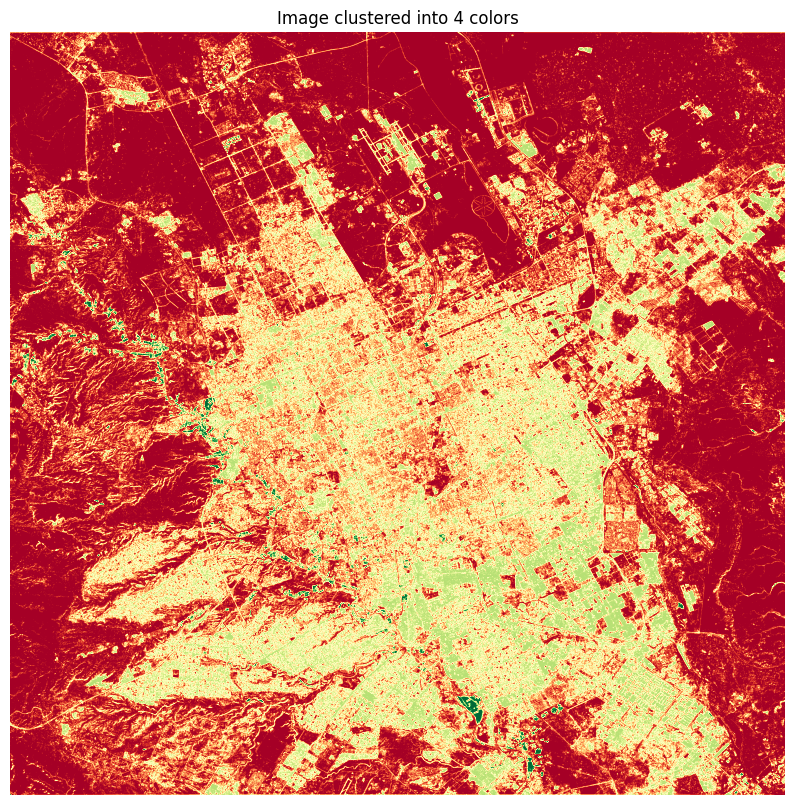

In [20]:
cluster_image(ndvi_processed_all, optimal_k=4)

c:\Users\Musae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


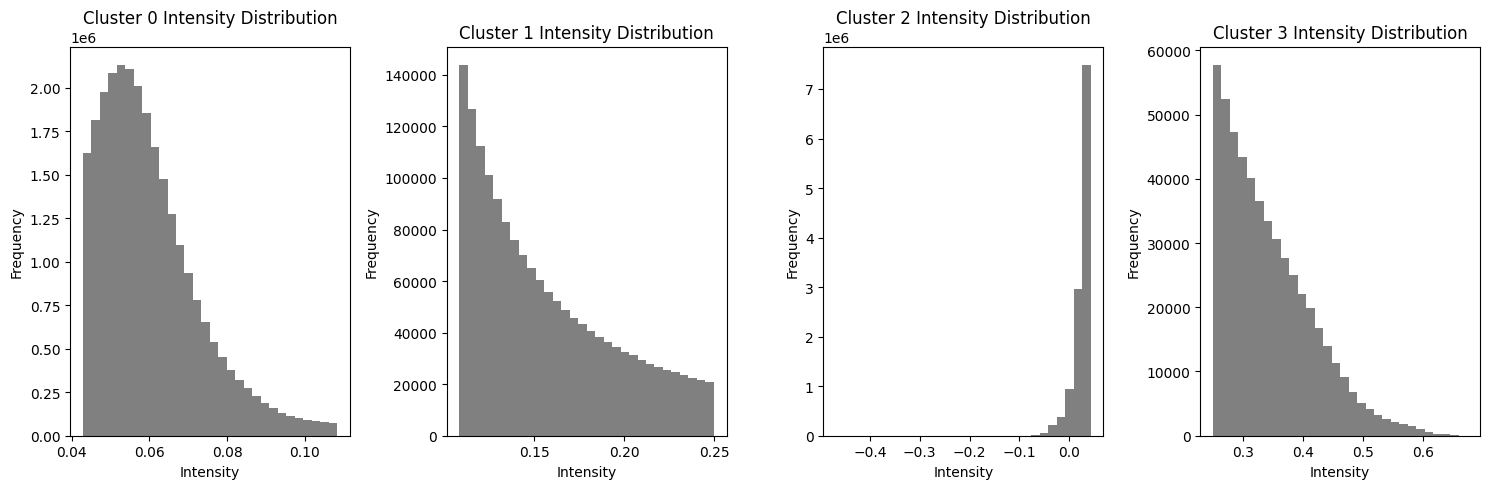

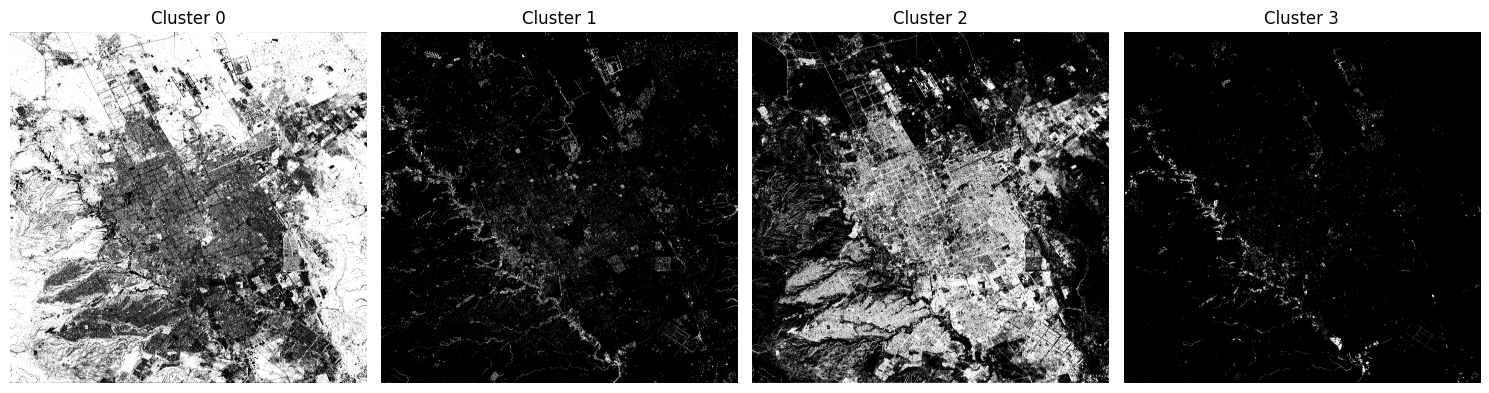

In [21]:


# Function to cluster the image and return the KMeans object and reshaped labels
def cluster_image(ndvi_processed_all, optimal_k):
    pixels = ndvi_processed_all.reshape(-1, 1)  # Reshape the 256x256 image for K-Means
    kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(pixels)
    return kmeans, kmeans.labels_.reshape(ndvi_processed_all.shape)

# Function to plot the distribution of pixel intensities in each cluster
def plot_cluster_intensity_distributions(kmeans_labels, img_array, optimal_k):
    plt.figure(figsize=(15, 5))
    for i in range(optimal_k):
        cluster_pixels = img_array[kmeans_labels == i]
        plt.subplot(1, optimal_k, i+1)
        plt.hist(cluster_pixels, bins=30, color='gray')
        plt.title(f'Cluster {i} Intensity Distribution')
        plt.xlabel('Intensity')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Function to visualize the spatial distribution of clusters
def visualize_clusters_spatially(kmeans_labels, optimal_k):
    fig, axes = plt.subplots(1, optimal_k, figsize=(15, 5))
    for i in range(optimal_k):
        cluster_img = np.zeros(kmeans_labels.shape)
        cluster_img[kmeans_labels == i] = 1  # Set pixels in the cluster to 1
        axes[i].imshow(cluster_img, cmap='gray')
        axes[i].set_title(f'Cluster {i}')
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()



# Clustering the image
optimal_k = 4  # Set the number of clusters
kmeans, kmeans_labels = cluster_image(ndvi_processed_all, optimal_k)

# Analyzing the clusters
plot_cluster_intensity_distributions(kmeans_labels, ndvi_processed_all, optimal_k)
visualize_clusters_spatially(kmeans_labels, optimal_k)


Cluster 0: 65.28% 
         range (0.043 - 0.108)

Cluster 1: 3.94%
         range (0.108 - 0.250)

Cluster 2: 29.52%
           range (-0.468 - 0.043)

Cluster 3: 1.26%
           range (0.250 - 0.673)

In [24]:
def calculate_cluster_percentages(kmeans_labels):
    total_pixels = kmeans_labels.size  # Total number of pixels in the image
    unique, counts = np.unique(kmeans_labels, return_counts=True)
    percentages = {k: count / total_pixels * 100 for k, count in zip(unique, counts)}
    return percentages

# Calculate and print cluster percentages
percentages = calculate_cluster_percentages(kmeans_labels)
for cluster, percentage in percentages.items():
    print(f"Cluster {cluster}: {percentage:.2f}%")


Cluster 0: 65.28%
Cluster 1: 3.94%
Cluster 2: 29.52%
Cluster 3: 1.26%


In [23]:
def print_cluster_value_ranges(kmeans_labels, img_array, optimal_k):
    # Iterate through each cluster
    for i in range(optimal_k):
        # Extract the pixels belonging to the current cluster
        cluster_pixels = img_array[kmeans_labels == i]
        
        # Calculate the minimum and maximum values within this cluster
        min_value = cluster_pixels.min()
        max_value = cluster_pixels.max()
        
        # Print the range of values for this cluster
        print(f'Cluster {i}: range ({min_value:.3f} - {max_value:.3f})')

# Assuming your `kmeans_labels`, `ndvi_processed_all`, and `optimal_k` variables are already defined as per your provided code
print_cluster_value_ranges(kmeans_labels, ndvi_processed_all, optimal_k)


Cluster 0: range (0.043 - 0.108)
Cluster 1: range (0.108 - 0.250)
Cluster 2: range (-0.468 - 0.043)
Cluster 3: range (0.250 - 0.673)


In [26]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def cluster_image(ndvi_processed_all, optimal_k):
    """
    Clusters the image using K-Means and reshapes the labels to the original image shape.
    Handles both 2D and 3D images.
    """
    if ndvi_processed_all.ndim == 3:
        original_shape = ndvi_processed_all.shape[:2]
        pixels = ndvi_processed_all.reshape(-1, ndvi_processed_all.shape[2])
    elif ndvi_processed_all.ndim == 2:
        original_shape = ndvi_processed_all.shape
        pixels = ndvi_processed_all.flatten().reshape(-1, 1)
    else:
        raise ValueError("Unsupported image dimensionality. Image must be 2D or 3D.")

    kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(pixels)
    return kmeans, kmeans.labels_.reshape(original_shape)

def plot_clustered_image(clustered_img, optimal_k):
    """
    Plots the clustered image.
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(clustered_img, cmap='RdYlGn')
    plt.title(f'Image clustered into {optimal_k} colors')
    plt.axis('off')
    plt.show()

def plot_cluster_intensity_distributions(kmeans_labels, img_array, optimal_k):
    """
    Plots the distribution of pixel intensities in each cluster.
    """
    plt.figure(figsize=(15, 5))
    for i in range(optimal_k):
        cluster_pixels = img_array[kmeans_labels == i]
        plt.subplot(1, optimal_k, i+1)
        plt.hist(cluster_pixels, bins=30, color='gray')
        plt.title(f'Cluster {i} Intensity Distribution')
        plt.xlabel('Intensity')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def visualize_clusters_spatially(kmeans_labels, optimal_k):
    """
    Visualizes the spatial distribution of clusters.
    """
    fig, axes = plt.subplots(1, optimal_k, figsize=(15, 5))
    for i in range(optimal_k):
        cluster_img = np.zeros(kmeans_labels.shape)
        cluster_img[kmeans_labels == i] = 1
        axes[i].imshow(cluster_img, cmap='gray')
        axes[i].set_title(f'Cluster {i}')
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

def calculate_cluster_percentages(kmeans_labels):
    """
    Calculates and prints the percentage of pixels in each cluster.
    """
    total_pixels = kmeans_labels.size
    unique, counts = np.unique(kmeans_labels, return_counts=True)
    percentages = {k: count / total_pixels * 100 for k, count in zip(unique, counts)}
    return percentages

def print_cluster_value_ranges(kmeans_labels, img_array, optimal_k):
    """
    Prints the value ranges for each cluster.
    """
    for i in range(optimal_k):
        cluster_pixels = img_array[kmeans_labels == i]
        min_value, max_value = cluster_pixels.min(), cluster_pixels.max()
        print(f'Cluster {i}: range ({min_value:.3f} - {max_value:.3f})')




c:\Users\Musae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


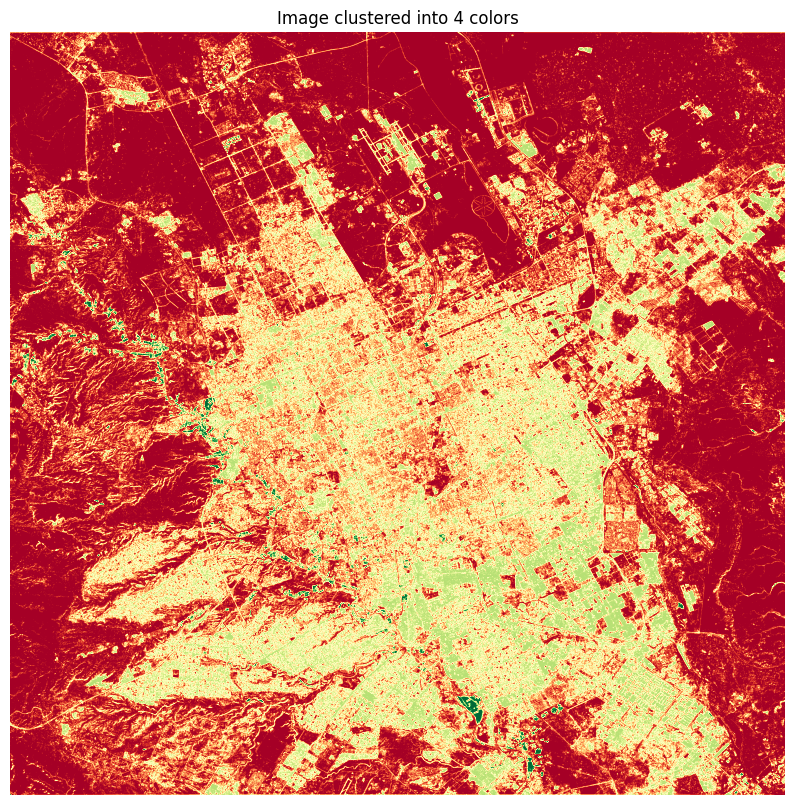

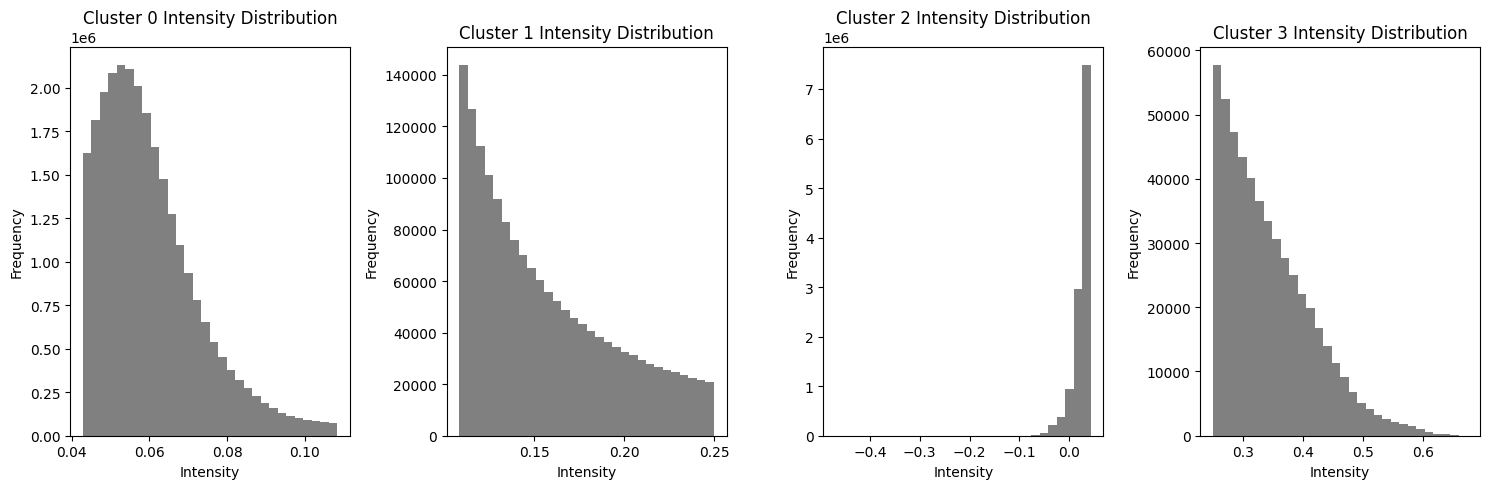

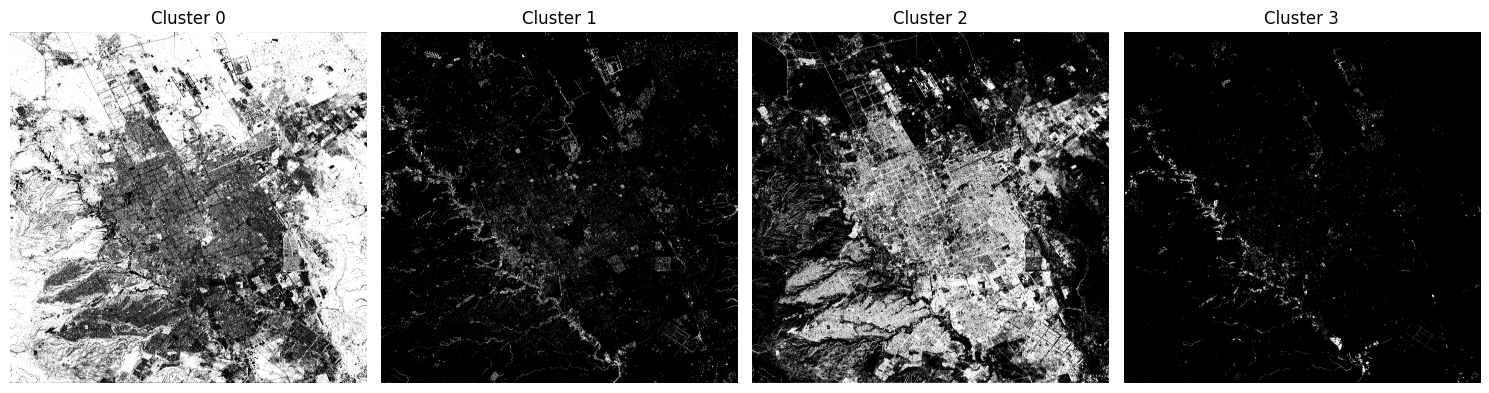

Cluster 0: 65.28%
Cluster 1: 3.94%
Cluster 2: 29.52%
Cluster 3: 1.26%
Cluster 0: range (0.043 - 0.108)
Cluster 1: range (0.108 - 0.250)
Cluster 2: range (-0.468 - 0.043)
Cluster 3: range (0.250 - 0.673)


In [27]:
# Example usage
optimal_k = 4
kmeans, kmeans_labels = cluster_image(ndvi_processed_all, optimal_k)
plot_clustered_image(kmeans_labels, optimal_k)
plot_cluster_intensity_distributions(kmeans_labels, ndvi_processed_all, optimal_k)
visualize_clusters_spatially(kmeans_labels, optimal_k)
percentages = calculate_cluster_percentages(kmeans_labels)
for cluster, percentage in percentages.items():
    print(f"Cluster {cluster}: {percentage:.2f}%")
print_cluster_value_ranges(kmeans_labels, ndvi_processed_all, optimal_k)

Cluster 0: 7.74%
Cluster 1: 37.76%
Cluster 2: 1.51%
Cluster 3: 52.98%

Cluster 0: range (0.126 - 0.293)
Cluster 1: range (-0.380 - 0.059)
Cluster 2: range (0.293 - 0.834)
Cluster 3: range (0.059 - 0.126)

Cluster 0: 37.77%
Cluster 1: 4.42%
Cluster 2: 1.24%
Cluster 3: 56.57%

Cluster 0: range (-0.448 - 0.059)
Cluster 1: range (0.135 - 0.310)
Cluster 2: range (0.310 - 0.809)
Cluster 3: range (0.059 - 0.135)

Cluster 0: 27.63%
Cluster 1: 3.62%
Cluster 2: 1.10%
Cluster 3: 67.65%

Cluster 0: range (-0.860 - 0.068)
Cluster 1: range (0.157 - 0.366)
Cluster 2: range (0.366 - 0.919)
Cluster 3: range (0.068 - 0.157)